In [1]:
import requests
from fake_useragent import UserAgent
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urljoin
import bs4

In [2]:
lstproductname=[]# List to store name of the product
lstprice =[] # List store pirice of the product
lstrating =[] # List to store ratings of the product
lstspecification = [] #List sto store specifications of the product
lstprocessor=[]
lstram=[]
lststorage=[]
lstos=[]
lstdisplay=[]
lstcamera=[]
lstbattery=[]
lstwarranty=[]
lstsimstype=[]
#lsthybridsim=[]
base_url="https://www.flipkart.com" #to read the sim type

In [3]:
user_agent = UserAgent()
product_name = input("Please enter a Product Name- ")

Please enter a Product Name- mobile phones


In [4]:
for i in range(1,12):
    url="https://www.flipkart.com/search?q={0}&page={1}"
    
    url=url.format(product_name,i)

    ##gettinh the response from the page using get method of requests module
    page = requests.get(url,headers={"user-agent":user_agent.chrome})
     ##storing the content of the page in a variable
    html = page.content

    ##creating beautifulsoup object
    page_soup =BeautifulSoup(html,"html.parser")

    for containers in page_soup.findAll('div',{'class':'_2kHMtA'}): 

        productname=containers.find('div',attrs={'class':'_4rR01T'}) #_2rpwqI   

        product_link=containers.find('a',attrs={'class':'_1fQZEK'})
        price=containers.find('div',attrs={'class':'_30jeq3'}) #_2rpwqI    
        rating = containers.find('div',attrs={'class':'_3LWZlK'})

        intIndex=0
        for feature in containers.find('ul',attrs={'class':'_1xgFaf'}):

            if intIndex==0:
                storage =feature.text
            elif intIndex ==1:
                display = feature.text
            elif intIndex ==2:
                if feature.text:
                    camera = feature.text
                else:
                    camera ='NaN'
            elif intIndex ==3:
                battery = feature.text
            elif intIndex ==4:
                processor = feature.text
            elif intIndex ==5:
                warranty = feature.text

            intIndex +=1
        #Pass the child url to get the details of the product
        child_url=urljoin(base_url,product_link['href'])

        resp = requests.get(child_url)
        page_child = BeautifulSoup(resp.text, 'html.parser')

        for table in page_child.findAll('table',attrs={'class':'_14cfVK'}): #test:
            ths = table.find_all('td')#,attrs={'class':'_1hKmbr col col-3-12'})
            tds = [th.text for th in ths]
            for td in tds:
                if td == 'SIM Type':
                    sim_type=tds[tds.index(td)+1]
               # elif td == 'Hybrid Sim Slot':
                  #  hybridsim_slot = tds[tds.index(td)+1]

            else:
                break
            break
        #loading the all the product sepecifications into the lists
        lstproductname.append(productname.text)
        lstprice.append(price.text)
        lststorage.append(storage)
        
        if type(rating) == bs4.element.Tag:
            lstrating.append(rating.text)            
        else:
            lstrating.append('NaN')
        
        lstdisplay.append(display)
        lstbattery.append(battery)
        lstprocessor.append(processor)
        lstwarranty.append(warranty)
        lstcamera.append(camera)
        lstsimstype.append(sim_type)
        #lsthybridsim.append(hybridsim_slot)
        #'Hybrid Sim Slot':lsthybridsim,
    products={'Product Name':lstproductname,'Processor':lstprocessor,'Storage':lststorage,
              'Display':lstdisplay,'Camera':lstcamera,'Battery':lstbattery,'Sim Type':lstsimstype,
              'Warranty':lstwarranty,'Price':lstprice,'Ratings':lstrating}



In [11]:
dataset= pd.DataFrame(data=products)
dataset.head()

,Product Name,Processor,Storage,Display,Camera,Battery,Sim Type,Warranty,Price,Ratings
0,"Realme Narzo 20 (Glory Silver, 64 GB)",MediaTek Helio G85 Processor,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.56 cm (6.52 inch) HD+ Display,48MP + 8MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Dual Sim,Brand Warranty of 1 Year Available for Mobile ...,"₹10,499",4.3
1,"Realme Narzo 20A (Victory Blue, 64 GB)",Qualcomm Snapdragon 665 Processor,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 2MP + 2MP | 8MP Front Camera,5000 mAh Lithium-ion Battery,Dual Sim,Brand Warranty of 1 Year Available for Mobile ...,"₹9,499",4.4
2,"Realme Narzo 20 (Glory Silver, 128 GB)",MediaTek Helio G85 Processor,4 GB RAM | 128 GB ROM | Expandable Upto 256 GB,16.56 cm (6.52 inch) HD+ Display,48MP + 8MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Dual Sim,Brand Warranty of 1 Year Available for Mobile ...,"₹11,499",4.3
3,"Realme Narzo 20 (Victory Blue, 128 GB)",MediaTek Helio G85 Processor,4 GB RAM | 128 GB ROM | Expandable Upto 256 GB,16.56 cm (6.52 inch) HD+ Display,48MP + 8MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Dual Sim,Brand Warranty of 1 Year Available for Mobile ...,"₹11,499",4.3
4,"Realme Narzo 20A (Glory Silver, 64 GB)",Qualcomm Snapdragon 665 Processor,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 2MP + 2MP | 8MP Front Camera,5000 mAh Lithium-ion Battery,Dual Sim,Brand Warranty of 1 Year Available for Mobile ...,"₹9,499",4.4


In [12]:
dfProd = dataset # changed from dataset to dfProd

In [13]:
dfProd['Price'] = dfProd['Price'].str.lstrip('₹')
dfProd['Price'] = dfProd['Price'].replace({',':''}, regex=True)
dfProd.head()

,Product Name,Processor,Storage,Display,Camera,Battery,Sim Type,Warranty,Price,Ratings
0,"Realme Narzo 20 (Glory Silver, 64 GB)",MediaTek Helio G85 Processor,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.56 cm (6.52 inch) HD+ Display,48MP + 8MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Dual Sim,Brand Warranty of 1 Year Available for Mobile ...,10499,4.3
1,"Realme Narzo 20A (Victory Blue, 64 GB)",Qualcomm Snapdragon 665 Processor,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 2MP + 2MP | 8MP Front Camera,5000 mAh Lithium-ion Battery,Dual Sim,Brand Warranty of 1 Year Available for Mobile ...,9499,4.4
2,"Realme Narzo 20 (Glory Silver, 128 GB)",MediaTek Helio G85 Processor,4 GB RAM | 128 GB ROM | Expandable Upto 256 GB,16.56 cm (6.52 inch) HD+ Display,48MP + 8MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Dual Sim,Brand Warranty of 1 Year Available for Mobile ...,11499,4.3
3,"Realme Narzo 20 (Victory Blue, 128 GB)",MediaTek Helio G85 Processor,4 GB RAM | 128 GB ROM | Expandable Upto 256 GB,16.56 cm (6.52 inch) HD+ Display,48MP + 8MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Dual Sim,Brand Warranty of 1 Year Available for Mobile ...,11499,4.3
4,"Realme Narzo 20A (Glory Silver, 64 GB)",Qualcomm Snapdragon 665 Processor,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 2MP + 2MP | 8MP Front Camera,5000 mAh Lithium-ion Battery,Dual Sim,Brand Warranty of 1 Year Available for Mobile ...,9499,4.4


In [14]:
#Split the Product name column and move the color into column and name to product name column
dfProd['Product Name']=dfProd['Product Name'].str.split(',', 1).str[0]
dfProd['Product Name'], dfProd['Color']=dfProd['Product Name'].str.split('(', 1).str
dfProd.head()

<ipython-input-14-bbcd5b903589>:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  dfProd['Product Name'], dfProd['Color']=dfProd['Product Name'].str.split('(', 1).str


,Product Name,Processor,Storage,Display,Camera,Battery,Sim Type,Warranty,Price,Ratings,Color
0,Realme Narzo 20,MediaTek Helio G85 Processor,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.56 cm (6.52 inch) HD+ Display,48MP + 8MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Dual Sim,Brand Warranty of 1 Year Available for Mobile ...,10499,4.3,Glory Silver
1,Realme Narzo 20A,Qualcomm Snapdragon 665 Processor,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 2MP + 2MP | 8MP Front Camera,5000 mAh Lithium-ion Battery,Dual Sim,Brand Warranty of 1 Year Available for Mobile ...,9499,4.4,Victory Blue
2,Realme Narzo 20,MediaTek Helio G85 Processor,4 GB RAM | 128 GB ROM | Expandable Upto 256 GB,16.56 cm (6.52 inch) HD+ Display,48MP + 8MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Dual Sim,Brand Warranty of 1 Year Available for Mobile ...,11499,4.3,Glory Silver
3,Realme Narzo 20,MediaTek Helio G85 Processor,4 GB RAM | 128 GB ROM | Expandable Upto 256 GB,16.56 cm (6.52 inch) HD+ Display,48MP + 8MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Dual Sim,Brand Warranty of 1 Year Available for Mobile ...,11499,4.3,Victory Blue
4,Realme Narzo 20A,Qualcomm Snapdragon 665 Processor,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 2MP + 2MP | 8MP Front Camera,5000 mAh Lithium-ion Battery,Dual Sim,Brand Warranty of 1 Year Available for Mobile ...,9499,4.4,Glory Silver


In [16]:
dfProd.dtypes

Product Name     object
Processor        object
Storage          object
Display          object
Camera           object
Battery          object
Sim Type         object
Warranty         object
Price           float64
Ratings         float64
Color            object
dtype: object

In [17]:
#Convert Price and ratings to float type
import numpy as np
dfProd['Price'] = dfProd['Price'].astype(np.float)
dfProd['Ratings']= dfProd['Ratings'].astype(np.float)

In [18]:
dfProd.dtypes

Product Name     object
Processor        object
Storage          object
Display          object
Camera           object
Battery          object
Sim Type         object
Warranty         object
Price           float64
Ratings         float64
Color            object
dtype: object

In [19]:
#Get a company name from product name its beginning of the first word.
dfProd['Company']=dfProd['Product Name'].str.split(' ', 1).str[0]

In [20]:
dfProd.head()

,Product Name,Processor,Storage,Display,Camera,Battery,Sim Type,Warranty,Price,Ratings,Color,Company
0,Realme Narzo 20,MediaTek Helio G85 Processor,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.56 cm (6.52 inch) HD+ Display,48MP + 8MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Dual Sim,Brand Warranty of 1 Year Available for Mobile ...,10499.0,4.3,Glory Silver,Realme
1,Realme Narzo 20A,Qualcomm Snapdragon 665 Processor,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 2MP + 2MP | 8MP Front Camera,5000 mAh Lithium-ion Battery,Dual Sim,Brand Warranty of 1 Year Available for Mobile ...,9499.0,4.4,Victory Blue,Realme
2,Realme Narzo 20,MediaTek Helio G85 Processor,4 GB RAM | 128 GB ROM | Expandable Upto 256 GB,16.56 cm (6.52 inch) HD+ Display,48MP + 8MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Dual Sim,Brand Warranty of 1 Year Available for Mobile ...,11499.0,4.3,Glory Silver,Realme
3,Realme Narzo 20,MediaTek Helio G85 Processor,4 GB RAM | 128 GB ROM | Expandable Upto 256 GB,16.56 cm (6.52 inch) HD+ Display,48MP + 8MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Dual Sim,Brand Warranty of 1 Year Available for Mobile ...,11499.0,4.3,Victory Blue,Realme
4,Realme Narzo 20A,Qualcomm Snapdragon 665 Processor,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 2MP + 2MP | 8MP Front Camera,5000 mAh Lithium-ion Battery,Dual Sim,Brand Warranty of 1 Year Available for Mobile ...,9499.0,4.4,Glory Silver,Realme


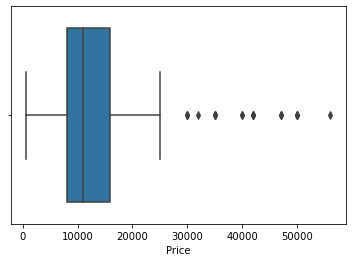

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=dfProd['Price']) # To  check if any outlier where the price range is very high

In [25]:
#Since our budget is 25k select price between 14000 to 30000 ruppes
dfProd1=dfProd[((dfProd['Price']>14000) & (dfProd['Price']<=30000))]

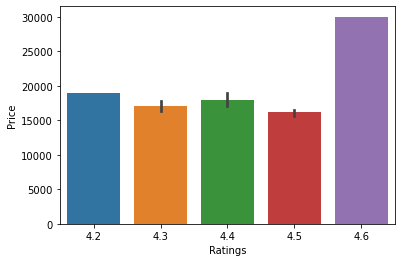

In [26]:
sns.barplot(y=dfProd1['Price'],x=dfProd1['Ratings'])


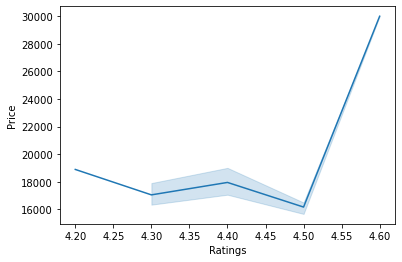

In [27]:
sns.lineplot(x=dfProd1['Ratings'],y=dfProd1['Price'])

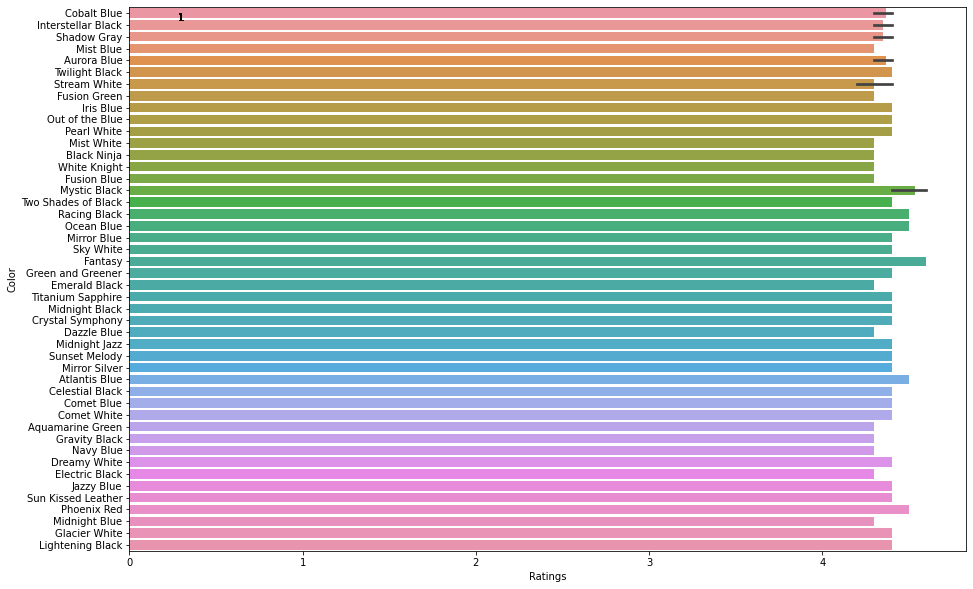

In [28]:

plt.figure(figsize=(15,10))
graph = sns.barplot(x=dfProd1['Ratings'], y=dfProd1['Color'], data = dfProd1)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
            
plt.show()

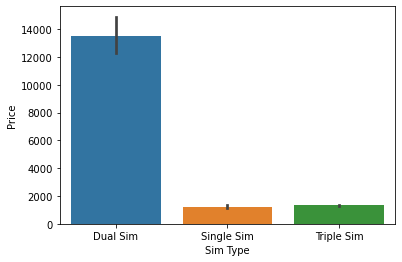

In [29]:
sns.barplot(x=dfProd['Sim Type'],y=dfProd['Price'])

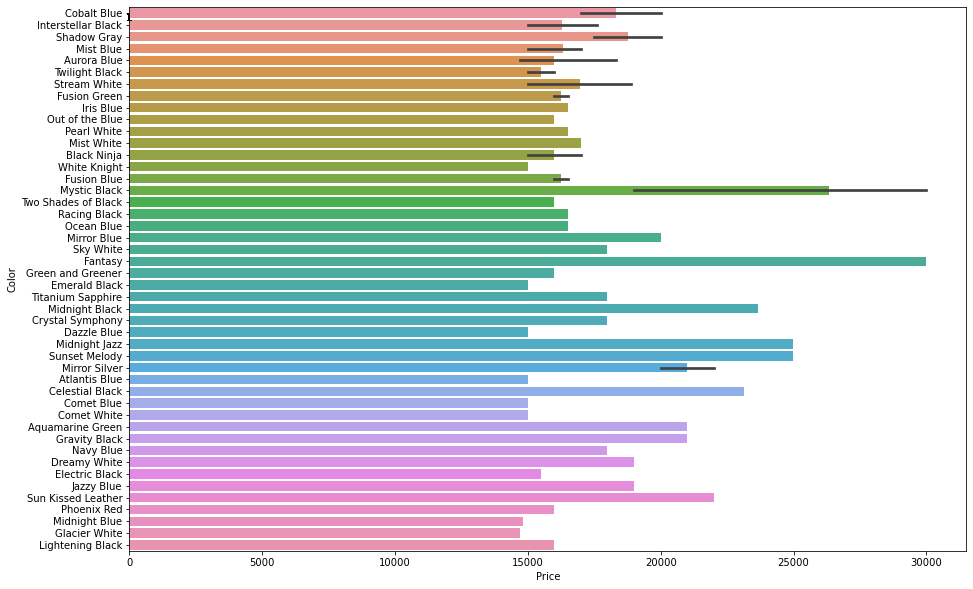

In [30]:
plt.figure(figsize=(15,10))
graph = sns.barplot(x=dfProd1['Price'], y=dfProd1['Color'], data = dfProd1)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')            
plt.show()

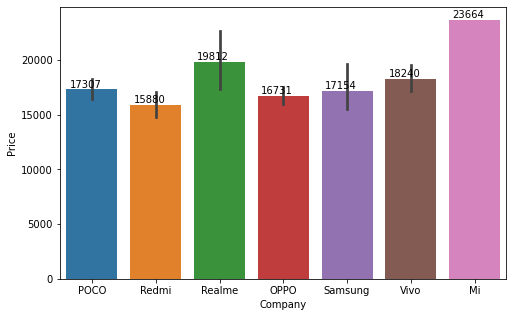

In [31]:
plt.figure(figsize=(8,5))
graph = sns.barplot(x=dfProd1['Company'], y=dfProd1['Price'], data = dfProd1 )
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')            
plt.show()

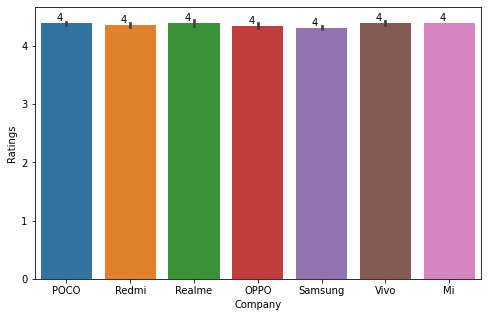

In [32]:
plt.figure(figsize=(8,5))
graph = sns.barplot(x=dfProd1['Company'], y=dfProd1['Ratings'], data = dfProd1 )
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')            
plt.show()

In [33]:
dfProd.to_csv('mobile_phones.csv')